In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [ ]:
# Function to load the data from Excel
def load_inventory_data(filename: str) -> pd.DataFrame:
    df = pd.read_excel(filename, header=5)  #Ingesting the data. The header of the file is 5 rows long
    df.columns = df.columns.str.strip()
    print("Columns found:", df.columns.tolist())
    return df

In [ ]:
# Function for cleaning and exploring data
def clean_and_explore_data(df: pd.DataFrame) -> pd.DataFrame:
    print("The first five rows:")
    print(df.head(), "\n")

    print("Info:")
    print(df.info(), "\n")

    # In case of missing values, it will be printed here
    print("Missing values:")
    print(df.isnull().sum(), "\n")

    df = df.drop_duplicates()
    df = df.fillna(0)

    return df

In [ ]:
# Function for anonymisation (fx Product Name)
def anonymize_data(df: pd.DataFrame) -> pd.DataFrame:
    if "Product Name" in df.columns:
        df["Product Name"] = df["Product Name"].apply(
            lambda x: hashlib.sha256(str(x).encode()).hexdigest()[:10]
        )
    return df

In [ ]:
# Function for visualization
def visualize_data(df: pd.DataFrame):
    #Simple plots based on data
    
    if "Number of Units Sold" in df.columns:
        # Histogram
        plt.figure(figsize=(8,5))
        df["Number of Units Sold"].plot(kind="hist", bins=15, edgecolor="black")
        plt.title("Distribution of Units Sold")
        plt.xlabel("Units Sold")
        plt.ylabel("Frequency") #Antal for forskellige produkter der er solgt x antal gange. 
        plt.show()

    if "Hand-In-Stock" in df.columns and "Product ID" in df.columns:
        # Sorting Hand-In-Stock
        sorted_df = df.sort_values("Hand-In-Stock", ascending=True)

        # Barplot basered on sorted DataFrame
        plt.figure(figsize=(10,6))
        plt.bar(sorted_df["Product ID"], sorted_df["Hand-In-Stock"])
        plt.title("Hand-In-Stock per Product (sorted by stock)")
        plt.xlabel("Product ID")
        plt.ylabel("Units in Stock")
        plt.xticks(rotation=90)
        plt.show()

    if "Number of Units Sold" in df.columns and "Cost Price Per Unit (USD)" in df.columns:
        # Scatterplot: Units sold vs. Cost price per unit
        plt.figure(figsize=(8,6))
        plt.scatter(df["Number of Units Sold"], df["Cost Price Per Unit (USD)"], alpha=0.7)
        plt.title("Units Sold vs. Cost per Unit")
        plt.xlabel("Units Sold")
        plt.ylabel("Cost Price Per Unit (USD)")
        plt.show()

Columns found: ['Product ID', 'Product Name', 'Opening Stock', 'Purchase/Stock in', 'Number of Units Sold', 'Hand-In-Stock', 'Cost Price Per Unit (USD)', 'Cost Price Total (USD)']
The first five rows:
  Product ID Product Name  Opening Stock  Purchase/Stock in  \
0       P101       Laptop             50                 20   
1       P102      Monitor             40                 15   
2       P103     Keyboard             60                 25   
3       P104   Headphones             30                 10   
4       P105   Smartphone             70                 30   

   Number of Units Sold  Hand-In-Stock  Cost Price Per Unit (USD)  \
0                    10             60                       1200   
1                     5             50                        500   
2                    15             70                         50   
3                     3             37                        100   
4                    20             80                        900   

   Co

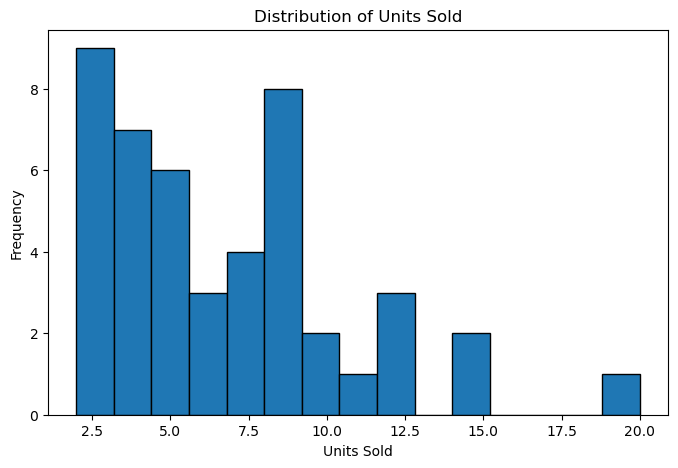

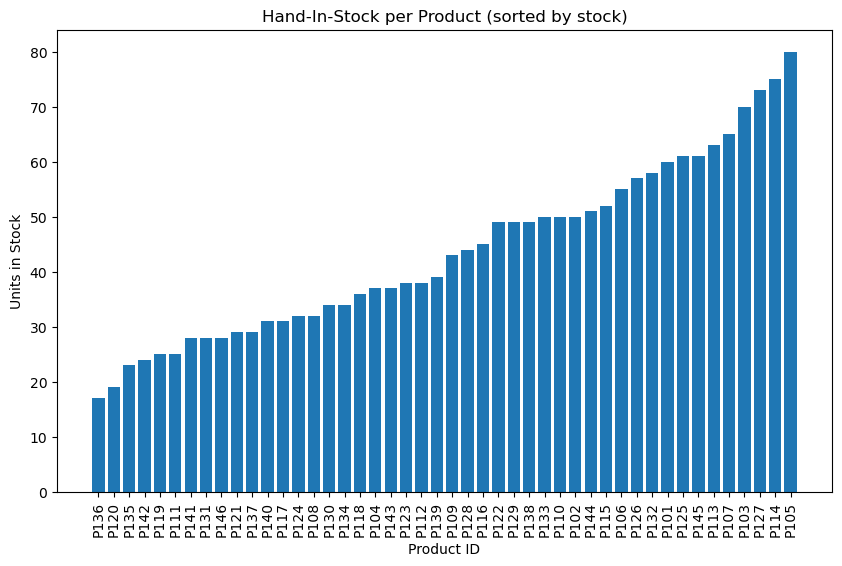

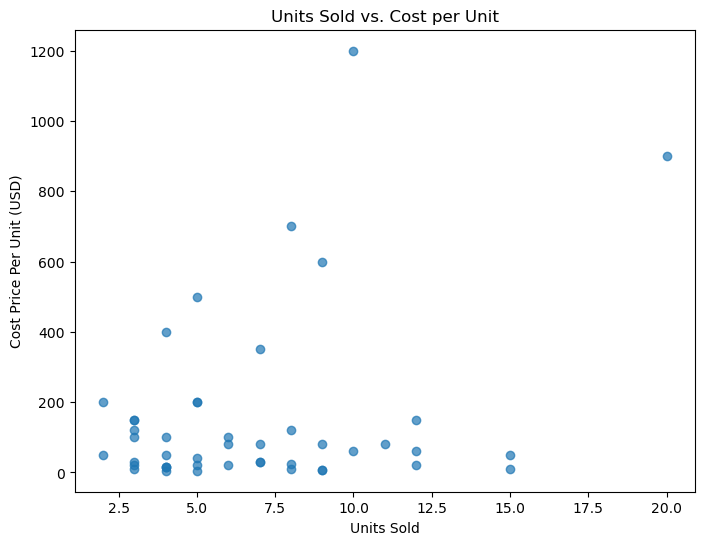

In [1]:
# Main function (Ingestion pipeline)
def main():
    filename = "Inventory-Records-Sample-Data.xlsx"  # The file is in the same folder

    # Load
    df = load_inventory_data(filename)

    # Clean & explore
    df = clean_and_explore_data(df)

    # Anonymize if needed
    df = anonymize_data(df)

    # Visualize
    visualize_data(df)


if __name__ == "__main__":
    main()
